# DCM Scheduling



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
import pickle
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [ ]:
df=pd.read_excel("ML/case_data.xlsx")
df.head(10)

,Number of Parties,Number of Evidence,Number of Witness,Number of Documents,Length of Pleading and Submissions,Number of Legal Issues,Amount of Time Required for Each Hearing,Degree of Public Interest,Degree of Experience of Judges and Lawyers,Degree of Urgency in Resolving the Case
0,4,75,10,500,250,125,5,High,High,High
1,2,150,20,750,300,200,3,Medium,Low,Medium
2,3,200,15,1000,350,150,2,Low,Medium,Low
3,1,125,12,600,275,175,6,Medium,High,Low
4,2,175,18,850,325,100,2,NaN,NaN,NaN


# Dimension of dataset


In [ ]:
rows,cols=df.shape

In [ ]:
print(f"There are {rows} rows and {cols} columns in dataset.")

There are 5 rows and 10 columns in dataset.


# Dataset Description


In [ ]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Number of Parties                           5 non-null      int64 
 1   Number of Evidence                          5 non-null      int64 
 2   Number of Witness                           5 non-null      int64 
 3   Number of Documents                         5 non-null      int64 
 4   Length of Pleading and Submissions          5 non-null      int64 
 5   Number of Legal Issues                      5 non-null      int64 
 6   Amount of Time Required for Each Hearing    5 non-null      int64 
 7   Degree of Public Interest                   4 non-null      object
 8   Degree of Experience of Judges and Lawyers  4 non-null      object
 9   Degree of Urgency in Resolving the Case     4 non-null      object
dtypes: int64(7), object(3)
memory 

# Null Values

In [ ]:
df.isna().sum()
df['Amount of Time Required for Each Hearing'] = df['Amount of Time Required for Each Hearing'].astype(str)
df['Degree of Public Interest'] = df['Degree of Public Interest'].astype(str)
df['Degree of Experience of Judges and Lawyers'] = df['Degree of Experience of Judges and Lawyers'].astype(str)
df['Degree of Urgency in Resolving the Case'] = df['Degree of Urgency in Resolving the Case'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Number of Parties                           5 non-null      int64 
 1   Number of Evidence                          5 non-null      int64 
 2   Number of Witness                           5 non-null      int64 
 3   Number of Documents                         5 non-null      int64 
 4   Length of Pleading and Submissions          5 non-null      int64 
 5   Number of Legal Issues                      5 non-null      int64 
 6   Amount of Time Required for Each Hearing    5 non-null      object
 7   Degree of Public Interest                   5 non-null      object
 8   Degree of Experience of Judges and Lawyers  5 non-null      object
 9   Degree of Urgency in Resolving the Case     5 non-null      object
dtypes: int64(6), object(4)
memory 

#Data Preprocessing

In [ ]:
df.reset_index(inplace = True)
r,c =df.shape
for i in range(r):
   df['Amount of Time Required for Each Hearing'][i] =df["Amount of Time Required for Each Hearing"][i]
df['Amount of Time Required for Each Hearing']= df["Amount of Time Required for Each Hearing"].apply(float)+120
df.head()

,index,Number of Parties,Number of Evidence,Number of Witness,Number of Documents,Length of Pleading and Submissions,Number of Legal Issues,Amount of Time Required for Each Hearing,Degree of Public Interest,Degree of Experience of Judges and Lawyers,Degree of Urgency in Resolving the Case
0,0,4,75,10,500,250,125,125.0,High,High,High
1,1,2,150,20,750,300,200,123.0,Medium,Low,Medium
2,2,3,200,15,1000,350,150,122.0,Low,Medium,Low
3,3,1,125,12,600,275,175,126.0,Medium,High,Low
4,4,2,175,18,850,325,100,122.0,nan,nan,nan


In [ ]:
df.drop('index',inplace=True,axis=1)
df.head()

,Number of Parties,Number of Evidence,Number of Witness,Number of Documents,Length of Pleading and Submissions,Number of Legal Issues,Amount of Time Required for Each Hearing,Degree of Public Interest,Degree of Experience of Judges and Lawyers,Degree of Urgency in Resolving the Case
0,4,75,10,500,250,125,125.0,High,High,High
1,2,150,20,750,300,200,123.0,Medium,Low,Medium
2,3,200,15,1000,350,150,122.0,Low,Medium,Low
3,1,125,12,600,275,175,126.0,Medium,High,Low
4,2,175,18,850,325,100,122.0,nan,nan,nan


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Number of Parties                           5 non-null      int64  
 1   Number of Evidence                          5 non-null      int64  
 2   Number of Witness                           5 non-null      int64  
 3   Number of Documents                         5 non-null      int64  
 4   Length of Pleading and Submissions          5 non-null      int64  
 5   Number of Legal Issues                      5 non-null      int64  
 6   Amount of Time Required for Each Hearing    5 non-null      float64
 7   Degree of Public Interest                   5 non-null      object 
 8   Degree of Experience of Judges and Lawyers  5 non-null      object 
 9   Degree of Urgency in Resolving the Case     5 non-null      object 
dtypes: float64(1), int

#Encoding

In [ ]:
catcol= ["Degree of Public Interest", "Degree of Experience of Judges and Lawyers", "Degree of Urgency in Resolving the Case"]
encoder=LabelEncoder()
for col in catcol:
  df[col]= encoder.fit_transform(df[col])
#0->High
#1->Low
#2->moderate
df.head()

,Number of Parties,Number of Evidence,Number of Witness,Number of Documents,Length of Pleading and Submissions,Number of Legal Issues,Amount of Time Required for Each Hearing,Degree of Public Interest,Degree of Experience of Judges and Lawyers,Degree of Urgency in Resolving the Case
0,4,75,10,500,250,125,125.0,0,0,0
1,2,150,20,750,300,200,123.0,2,1,2
2,3,200,15,1000,350,150,122.0,1,2,1
3,1,125,12,600,275,175,126.0,2,0,1
4,2,175,18,850,325,100,122.0,3,3,3


#Splitting The dataset

In [ ]:
x=df.drop('Degree of Urgency in Resolving the Case', axis = 1)
y= df['Degree of Urgency in Resolving the Case']
df.info()
x_train, x_test,y_train,y_test =train_test_split(x,y, shuffle =True, random_state=42, test_size=0.3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Number of Parties                           5 non-null      int64  
 1   Number of Evidence                          5 non-null      int64  
 2   Number of Witness                           5 non-null      int64  
 3   Number of Documents                         5 non-null      int64  
 4   Length of Pleading and Submissions          5 non-null      int64  
 5   Number of Legal Issues                      5 non-null      int64  
 6   Amount of Time Required for Each Hearing    5 non-null      float64
 7   Degree of Public Interest                   5 non-null      int64  
 8   Degree of Experience of Judges and Lawyers  5 non-null      int64  
 9   Degree of Urgency in Resolving the Case     5 non-null      int64  
dtypes: float64(1), int

#Model Selection

In [ ]:
models= {
'Logistic Regression': LogisticRegression(),
'RandomForestClassifier':RandomForestClassifier(),
'DecisionTreeClassifer': DecisionTreeClassifier(),
'SVM':SVC()
}
for i in range(len(models)):
  model= list(models.values())[i]
  model.fit(x_train,y_train)
  train_preds= model.predict(x_train)
  test_preds =model.predict(x_test)
  model_name =list(models.keys())[i]
  print(model_name)
  print("Training dataset accuracy: ")
  print("Accuracy", accuracy_score(y_train, train_preds))
  print()
  print("Testing dataset accuracy: ")
  print("Accuracy", accuracy_score(y_test, test_preds))
  print()
  print('------------------------------------------------------------------------------')


Logistic Regression
Training dataset accuracy: 
Accuracy 1.0

Testing dataset accuracy: 
Accuracy 0.0

------------------------------------------------------------------------------
RandomForestClassifier
Training dataset accuracy: 
Accuracy 1.0

Testing dataset accuracy: 
Accuracy 0.0

------------------------------------------------------------------------------
DecisionTreeClassifer
Training dataset accuracy: 
Accuracy 1.0

Testing dataset accuracy: 
Accuracy 0.0

------------------------------------------------------------------------------
SVM
Training dataset accuracy: 
Accuracy 0.6666666666666666

Testing dataset accuracy: 
Accuracy 0.0

------------------------------------------------------------------------------


RandomForestClassifier()

In [ ]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)
model.predict([[3,30,9,45,20,10,540,50,50]])
#array([0])

array([0])

#Saving the Model


In [ ]:
joblib.dump(model,'rf_model.joblib')
print("Model Saved")

pickle.dump(model,open('finalized_model.sav','wb'))
feature_names=[f"feature{i}" for i in range(x.shape[1])]
import time
import numpy as np
start_time=time.time()
importances= model.feature_importances_
std=np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time=time.time()-start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Model Saved
Elapsed time to compute the importances: 0.016 seconds


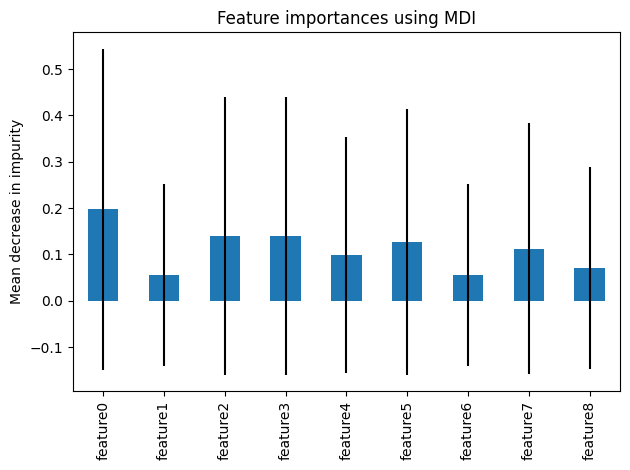

In [ ]:
import pandas as pd
forest_importances=pd.Series(importances, index=feature_names)
fig, ax= plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
def calculate_urgency(parties, evidence, witness, documents, pleading, issue, time_hearing,public_interest, eperience):
  model= pickle.load(open('finalized_model.sav', 'rb'))
  pred =model.predict([[parties, evidence, witness, documents, pleading, issue, time_hearing,public_interest, eperience]])
  return pred[0]
print(calculate_urgency (5,38,9,45,20, 10,548,50,50))
print(calculate_urgency (15,30,15, 45, 50, 10,540, 150, 50))

0
0
